# Vowel Formant Plotting

This notebook takes in data collected from the vowel data collection notebook and plots the formants on a standard F1/F2 vowel chart.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import json
import ast

In [100]:
# Prepare texts
TEXTS = [
    "Petey's mom got a CD record of 'Everlong' by Foo Fighters.",
    "Jude said goodbye to his pet goose when he moved to Tuscon, Arizona.",
    "I went to watch a movie instead, and I met my friend there.",
    "My dog thought it was odd that he never got to eat human food.",
    "Who bought my seat at the 3D movie theater?",
    "My job schedule is full – can Bob do Tuesday at the beach instead?"
]

CONDITIONS = ["Slow", "Natural", "Open-jaw", "Slurred"]

# Prepare vowels
VOWELS = ["i", "e", "a", "u"]
VOWELS_IPA = ["i", "ε", "ɑ", "u"]

# Prepare condition labels
CONDITION_1 = [f"c0s{i}" for i in range(6)]
CONDITION_2 = [f"c1s{i}" for i in range(6)]
CONDITION_3 = [f"c2s{i}" for i in range(6)]
CONDITION_4 = [f"c3s{i}" for i in range(6)]

# Quick translation for 'e' and 'a'
def ipa(vowel):
    return vowel.replace("e", "ε").replace("a", "ɑ")

## Load data

In [2]:
with open('vowel_data.json') as json_file:
    data_str = json.load(json_file)
    
data = ast.literal_eval(data_str)

## Concatenate data

For plotting purposes, I will use two datasets: the first one is taken directly from the json file. The second one will concatenate all the vowel data across a set of different conditions and sentences.

In [75]:
def concatenate_vowel_data(all_vowel_data, vowel):
    f1_data = []
    f2_data = []
    
    for sentence, data in all_vowel_data.items():
        f1, f2 = data[vowel]
        f1_data.extend(f1)
        f2_data.extend(f2)
    
    return np.array([f1_data, f2_data])

# Get data from each condition (subsets of the data)
data_c0 = {label: data[label] for label in CONDITION_1}
data_c1 = {label: data[label] for label in CONDITION_2}
data_c2 = {label: data[label] for label in CONDITION_3}
data_c3 = {label: data[label] for label in CONDITION_4}

# Get concatenated data for each condition
data_concat_c0 = {key: concatenate_vowel_data(data_c0, key) for key in VOWELS}
data_concat_c1 = {key: concatenate_vowel_data(data_c1, key) for key in VOWELS}
data_concat_c2 = {key: concatenate_vowel_data(data_c2, key) for key in VOWELS}
data_concat_c3 = {key: concatenate_vowel_data(data_c3, key) for key in VOWELS}

## Plot data

The following includes code for plots. This code was originally written by me but significantly edited, debugged, and polished by ChatGPT. 

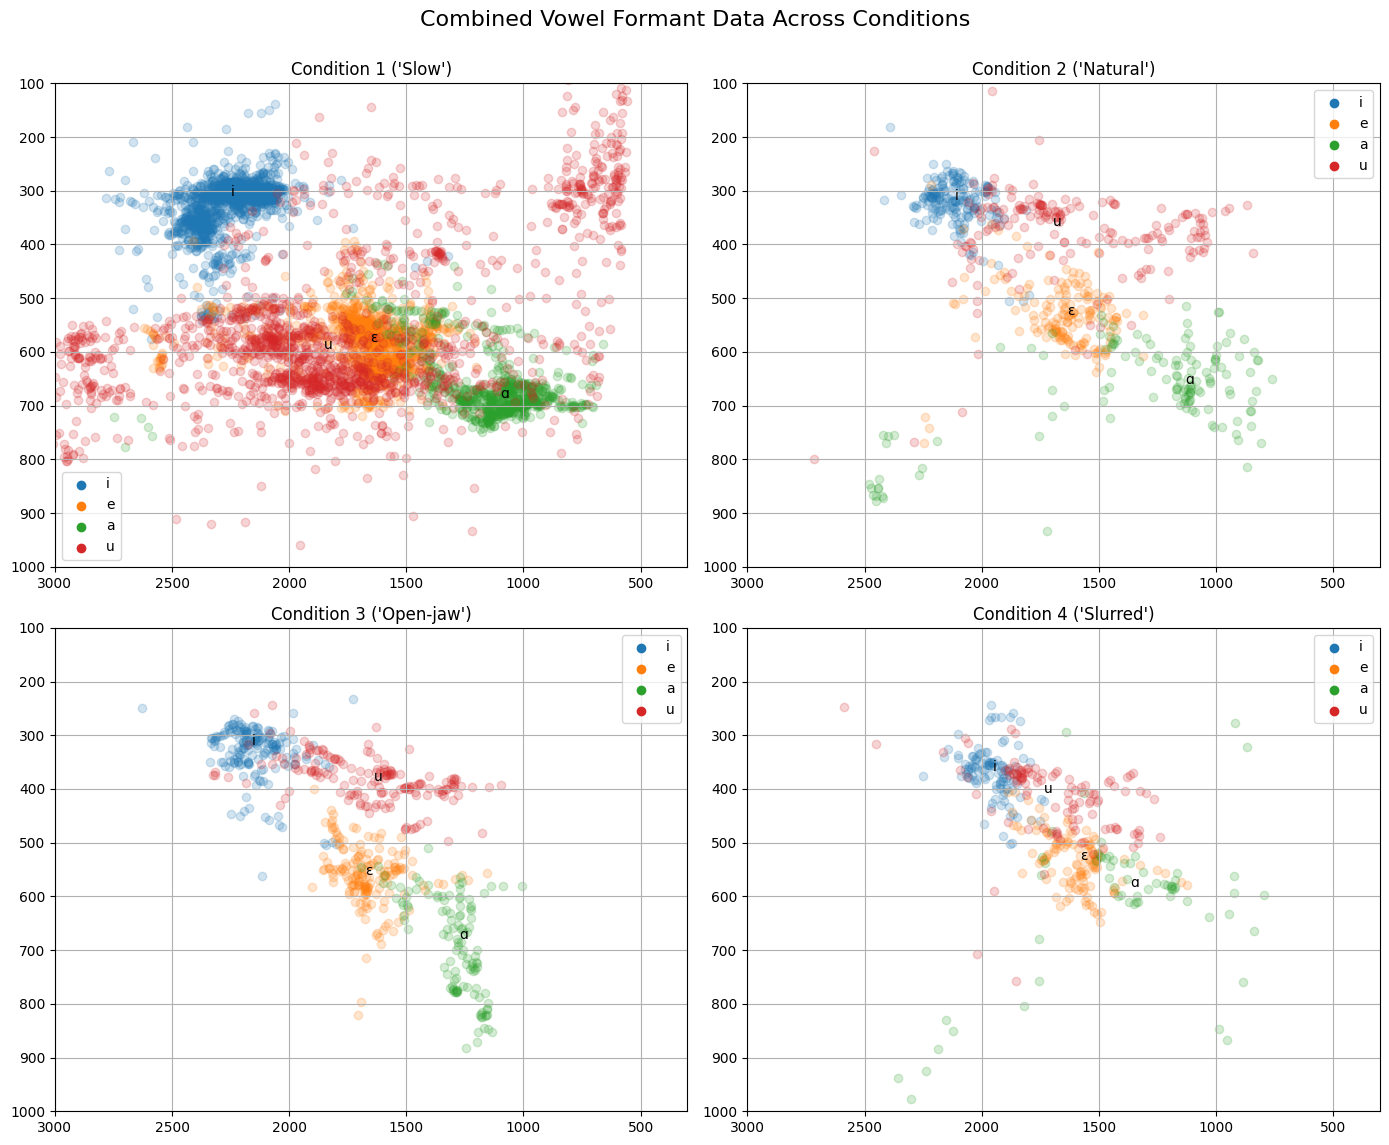

In [102]:
# Assuming `data_concat_c0`, `data_concat_c1`, `data_concat_c2`, `data_concat_c3` are defined and `ipa` function is available

def plot_vowel_data2(ax, vowel_data, condition_num):
    for vowel, d in vowel_data.items():
        f1, f2 = d
        f1_med = np.nanmedian(f1)
        f2_med = np.nanmedian(f2)
        ax.scatter(f2, f1, marker="o", alpha=0.2, label=vowel)
        ax.annotate(text=ipa(vowel), xy=(f2_med, f1_med))
    
    ax.set_xlim(300, 3000)
    ax.set_ylim(100, 1000)
    ax.invert_yaxis()
    ax.invert_xaxis()
    ax.grid(True)
    
    # Title for the condition
    ax.set_title(f"Condition {condition_num + 1} ('{CONDITIONS[condition_num]}')")

    # Legend
    leg = ax.legend()
    for lh in leg.legend_handles:
        lh.set_alpha(1)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot each condition in its respective subplot
plot_vowel_data2(axes[0, 0], data_concat_c0, 0)
plot_vowel_data2(axes[0, 1], data_concat_c1, 1)
plot_vowel_data2(axes[1, 0], data_concat_c2, 2)
plot_vowel_data2(axes[1, 1], data_concat_c3, 3)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Combined Vowel Formant Data Across Conditions", fontsize=16)
plt.show()


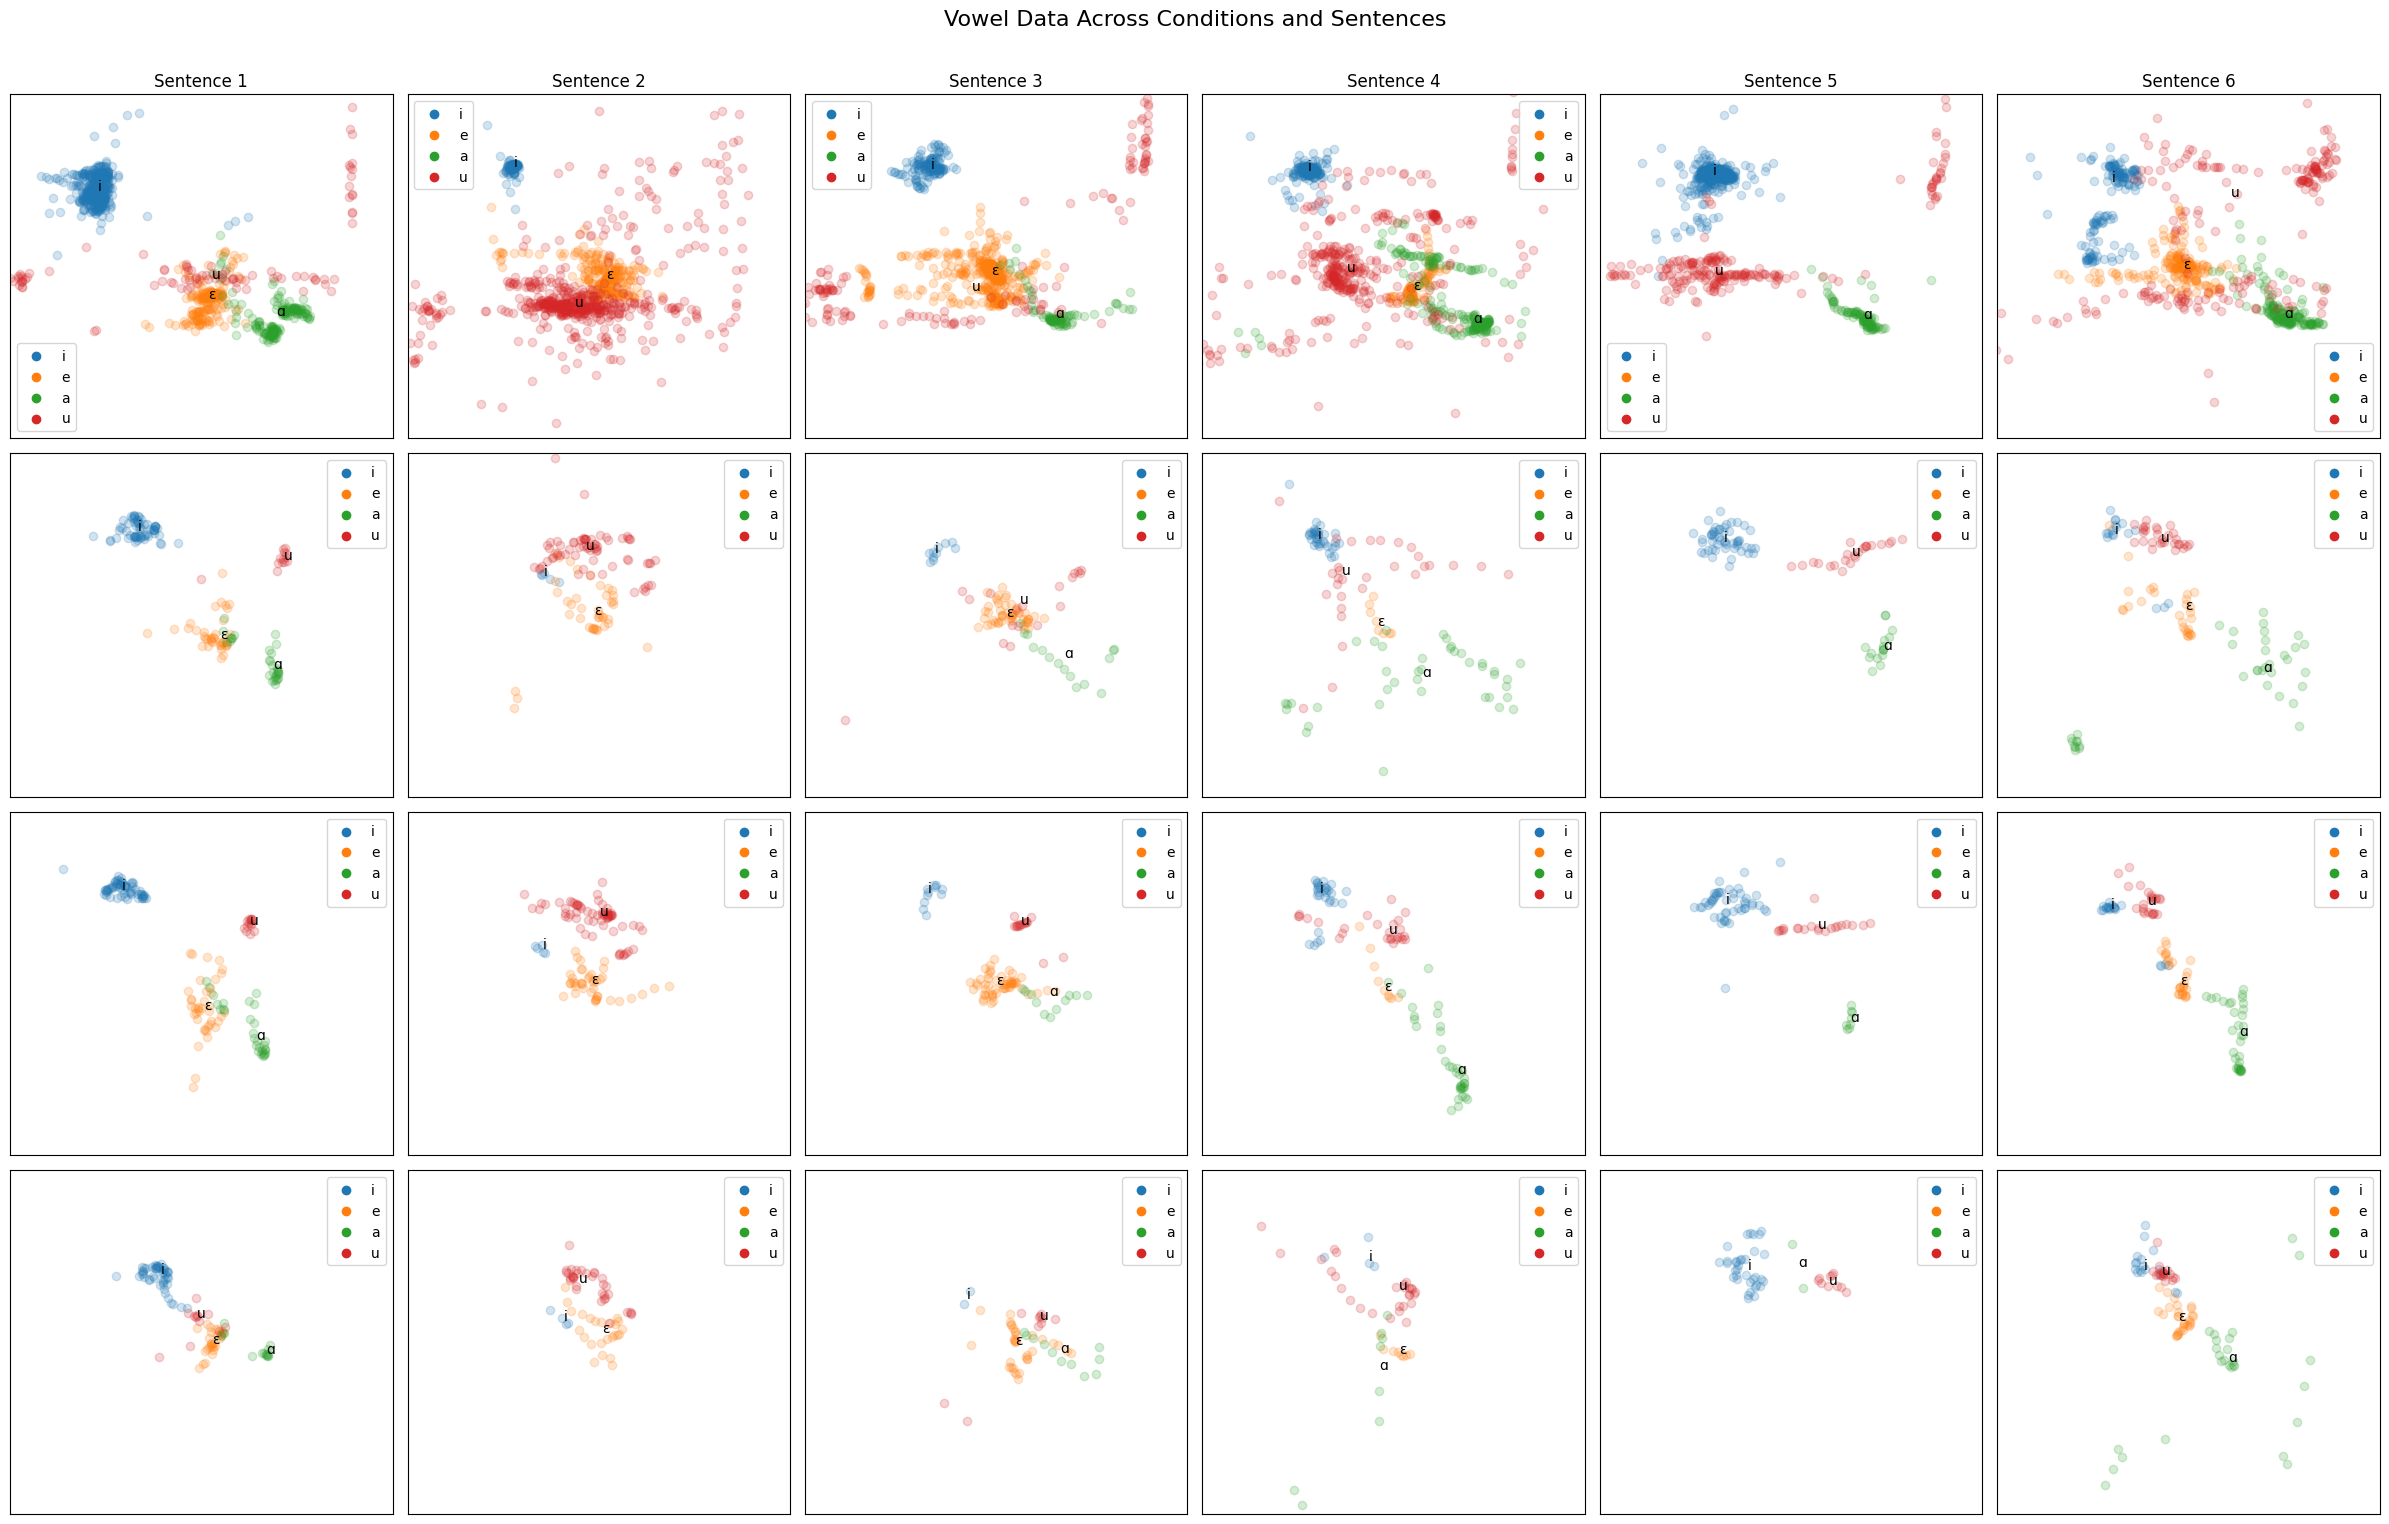

In [59]:
# Assuming `data`, `ipa`, `CONDITIONS`, and `TEXTS` are already defined

def plot_vowel_data(ax, c_id, s_id):
    vowel_data = data[f"c{c_id}s{s_id}"]
    
    for vowel, d in vowel_data.items():
        f1, f2 = d
        f1_med = np.nanmedian(f1)
        f2_med = np.nanmedian(f2)
        ax.scatter(f2, f1, marker="o", alpha=0.2, label=vowel)
        ax.annotate(text=ipa(vowel), xy=(f2_med, f1_med))
    
    ax.set_xlim(300, 3000)
    ax.set_ylim(100, 1000)
    ax.invert_yaxis()
    ax.invert_xaxis()
    ax.grid(True)
    
    leg = ax.legend()
    for lh in leg.legend_handles:
        lh.set_alpha(1)

# Create a 4x6 grid of subplots
fig, axes = plt.subplots(4, 6, figsize=(24, 16))

# Plot each condition and sentence in its respective subplot
for i in range(4):
    for j in range(6):
        ax = axes[i, j]
        plot_vowel_data(ax, i, j)
        
        # Set the titles for the columns (sentence numbers)
        if i == 0:
            ax.set_title(f"Sentence {j + 1}")
        
        # Set the y-axis labels for the rows (condition numbers)
        if j == 0:
            ax.set_ylabel(f"Condition {i + 1}")
            
        # Remove x and y labels
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Vowel Formant Data Across Conditions and Sentences", fontsize=16)
plt.show()


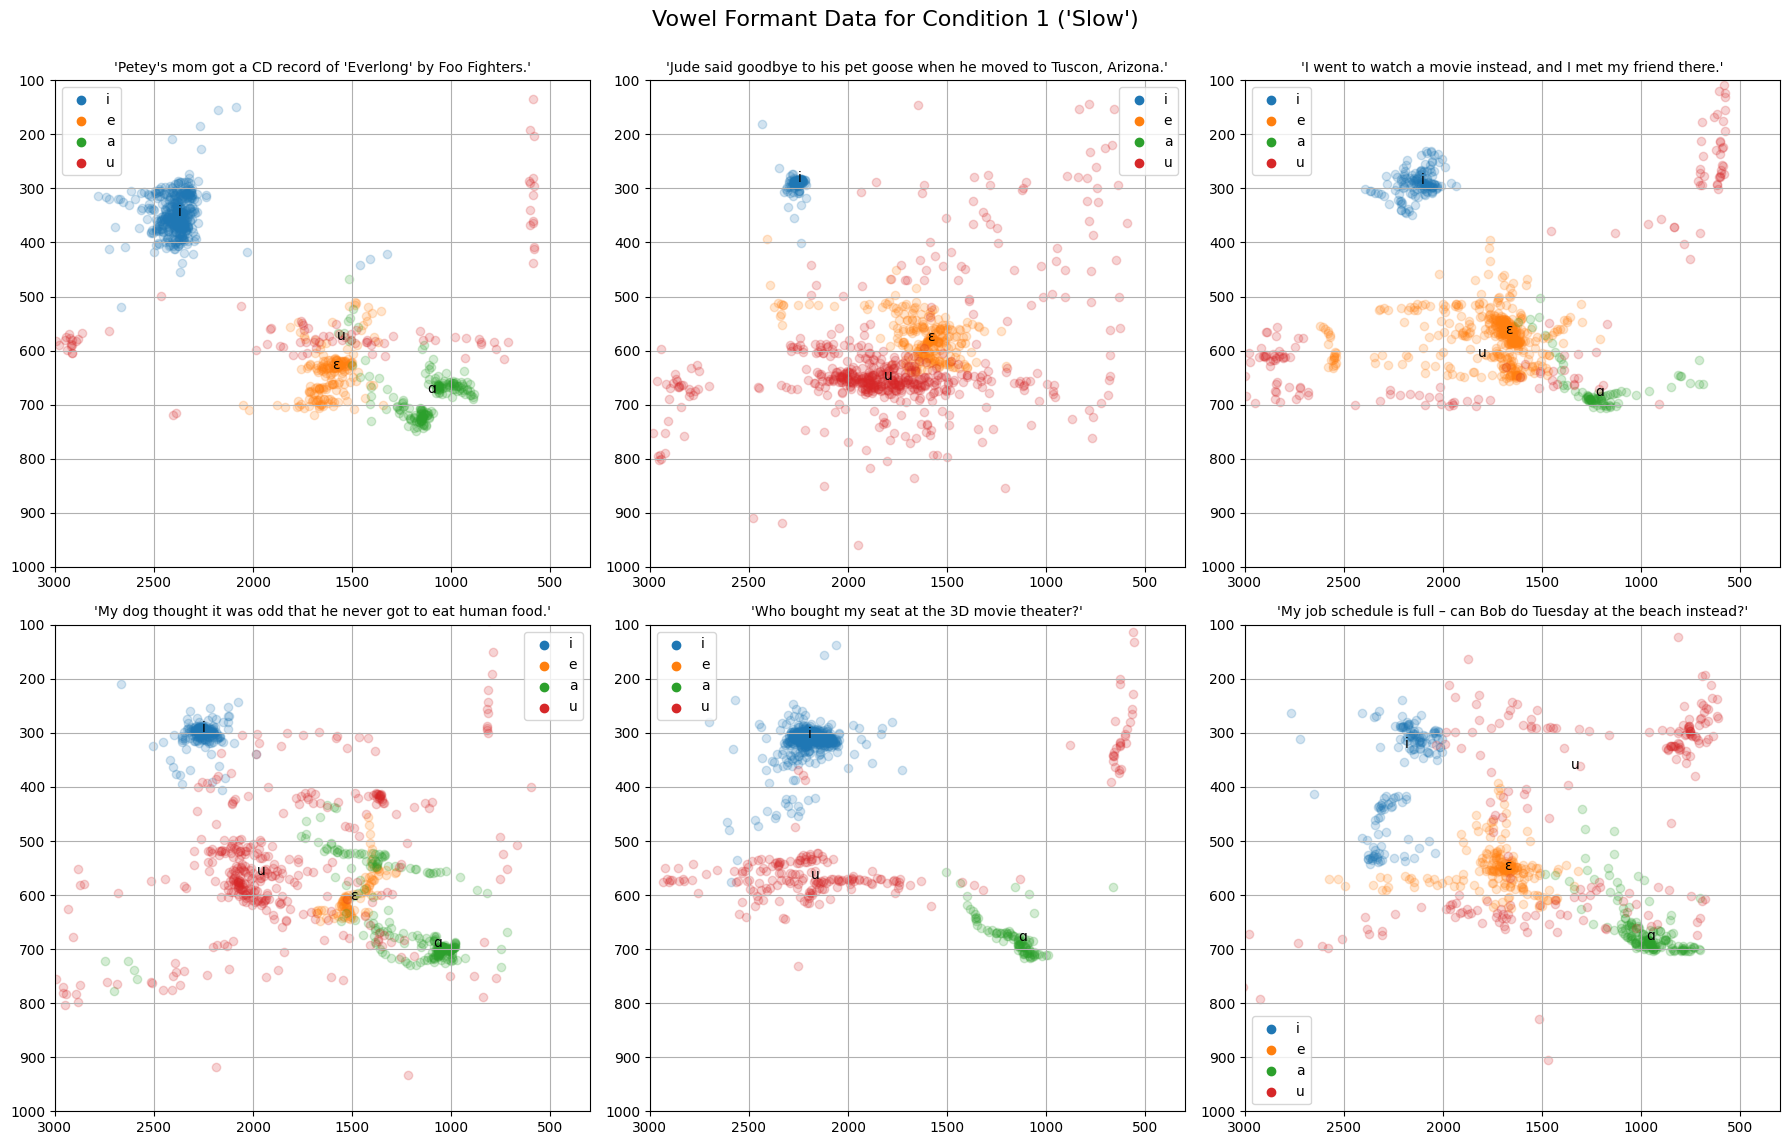

In [67]:
# Assuming `data`, `ipa`, `CONDITIONS`, and `TEXTS` are already defined

def plot_vowel_data_single(ax, c_id, s_id):
    vowel_data = data[f"c{c_id}s{s_id}"]
    
    for vowel, d in vowel_data.items():
        f1, f2 = d
        f1_med = np.nanmedian(f1)
        f2_med = np.nanmedian(f2)
        ax.scatter(f2, f1, marker="o", alpha=0.2, label=vowel)
        ax.annotate(text=ipa(vowel), xy=(f2_med, f1_med))
    
    ax.set_xlim(300, 3000)
    ax.set_ylim(100, 1000)
    ax.invert_yaxis()
    ax.invert_xaxis()
    ax.grid(True)
    
    leg = ax.legend()
    for lh in leg.legend_handles:
        lh.set_alpha(1)

# Specify the condition (e.g., condition 0)
condition_id = 0

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot the specified condition and each sentence in its respective subplot
for j in range(6):
    ax = axes[j // 3, j % 3]
    plot_vowel_data_single(ax, condition_id, j)
    
    # Set the titles for the columns (sentence numbers)
    ax.set_title(f"'{TEXTS[j]}'", fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(f"Vowel Formant Data for Condition {condition_id + 1} ('Slow')", fontsize=16)
plt.show()


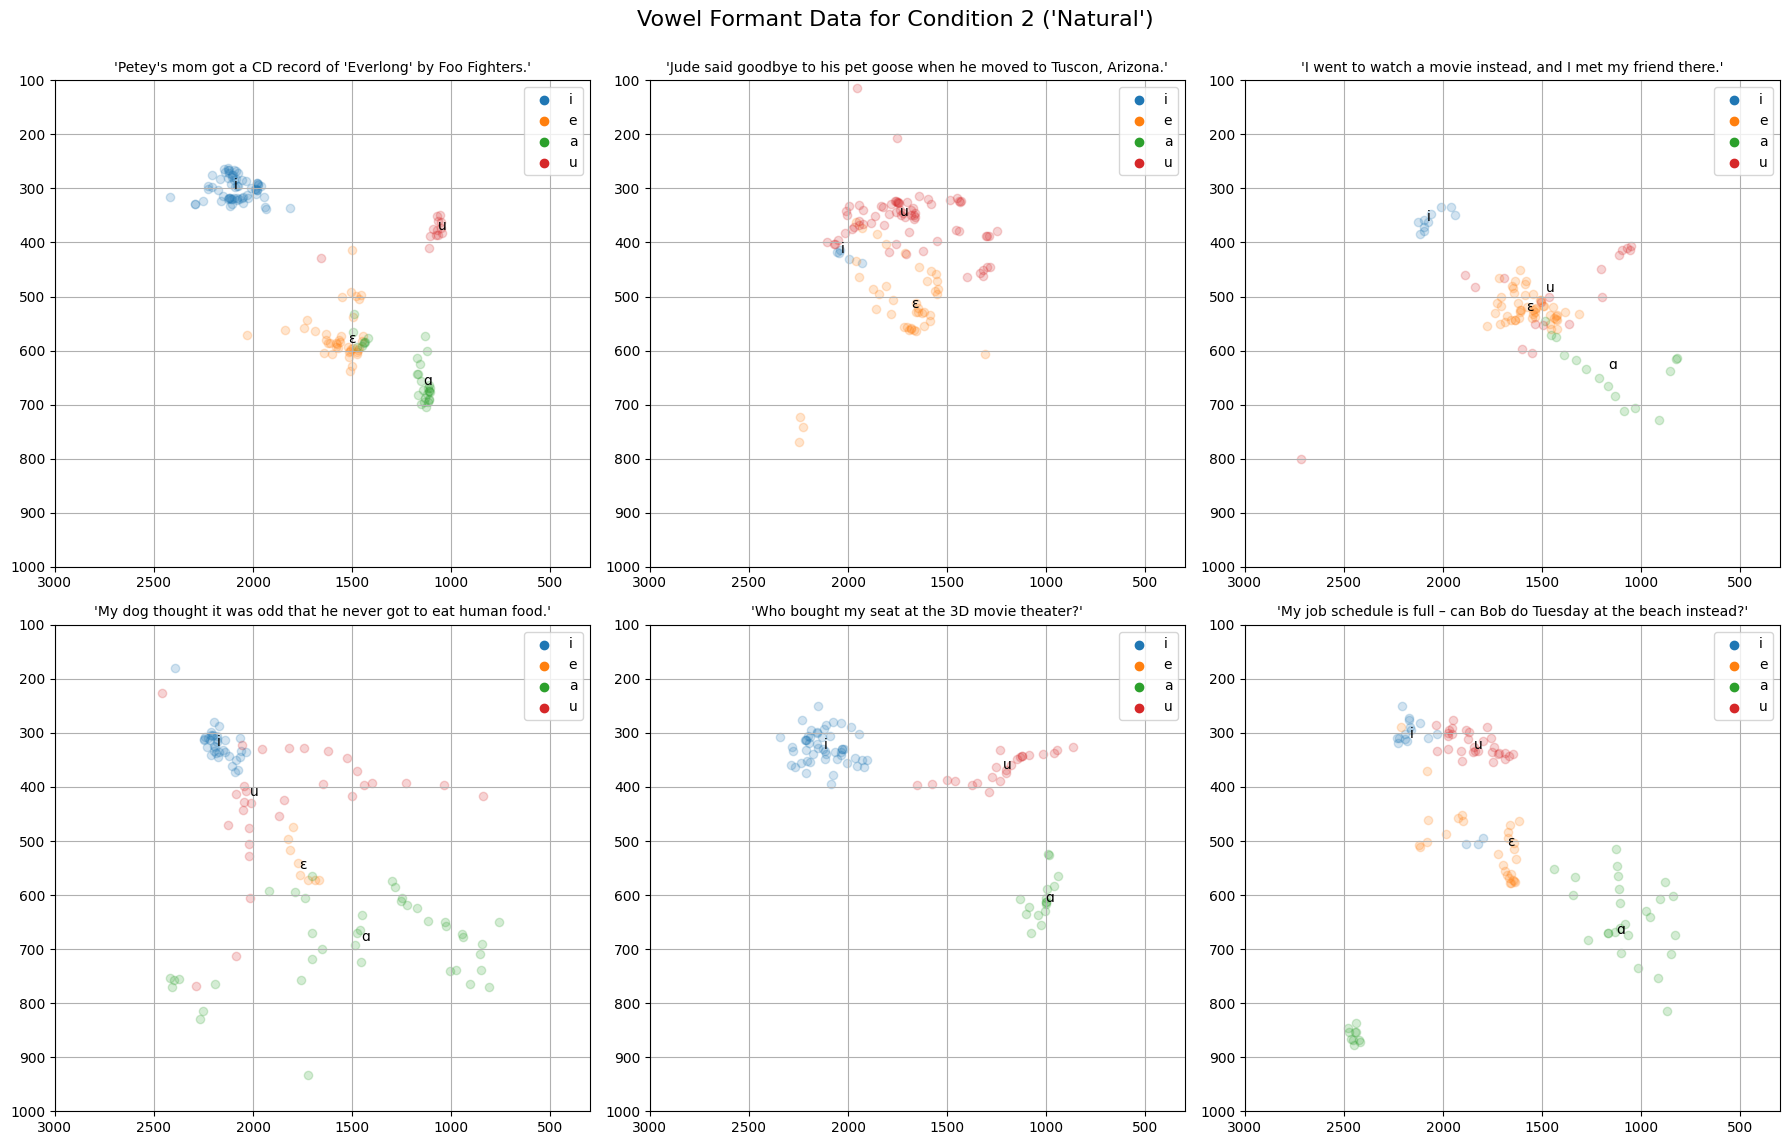

In [69]:
# Assuming `data`, `ipa`, `CONDITIONS`, and `TEXTS` are already defined

def plot_vowel_data_single(ax, c_id, s_id):
    vowel_data = data[f"c{c_id}s{s_id}"]
    
    for vowel, d in vowel_data.items():
        f1, f2 = d
        f1_med = np.nanmedian(f1)
        f2_med = np.nanmedian(f2)
        ax.scatter(f2, f1, marker="o", alpha=0.2, label=vowel)
        ax.annotate(text=ipa(vowel), xy=(f2_med, f1_med))
    
    ax.set_xlim(300, 3000)
    ax.set_ylim(100, 1000)
    ax.invert_yaxis()
    ax.invert_xaxis()
    ax.grid(True)
    
    leg = ax.legend()
    for lh in leg.legend_handles:
        lh.set_alpha(1)

# Specify the condition (e.g., condition 0)
condition_id = 1

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot the specified condition and each sentence in its respective subplot
for j in range(6):
    ax = axes[j // 3, j % 3]
    plot_vowel_data_single(ax, condition_id, j)
    
    # Set the titles for the columns (sentence numbers)
    ax.set_title(f"'{TEXTS[j]}'", fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(f"Vowel Formant Data for Condition {condition_id + 1} ('Natural')", fontsize=16)
plt.show()


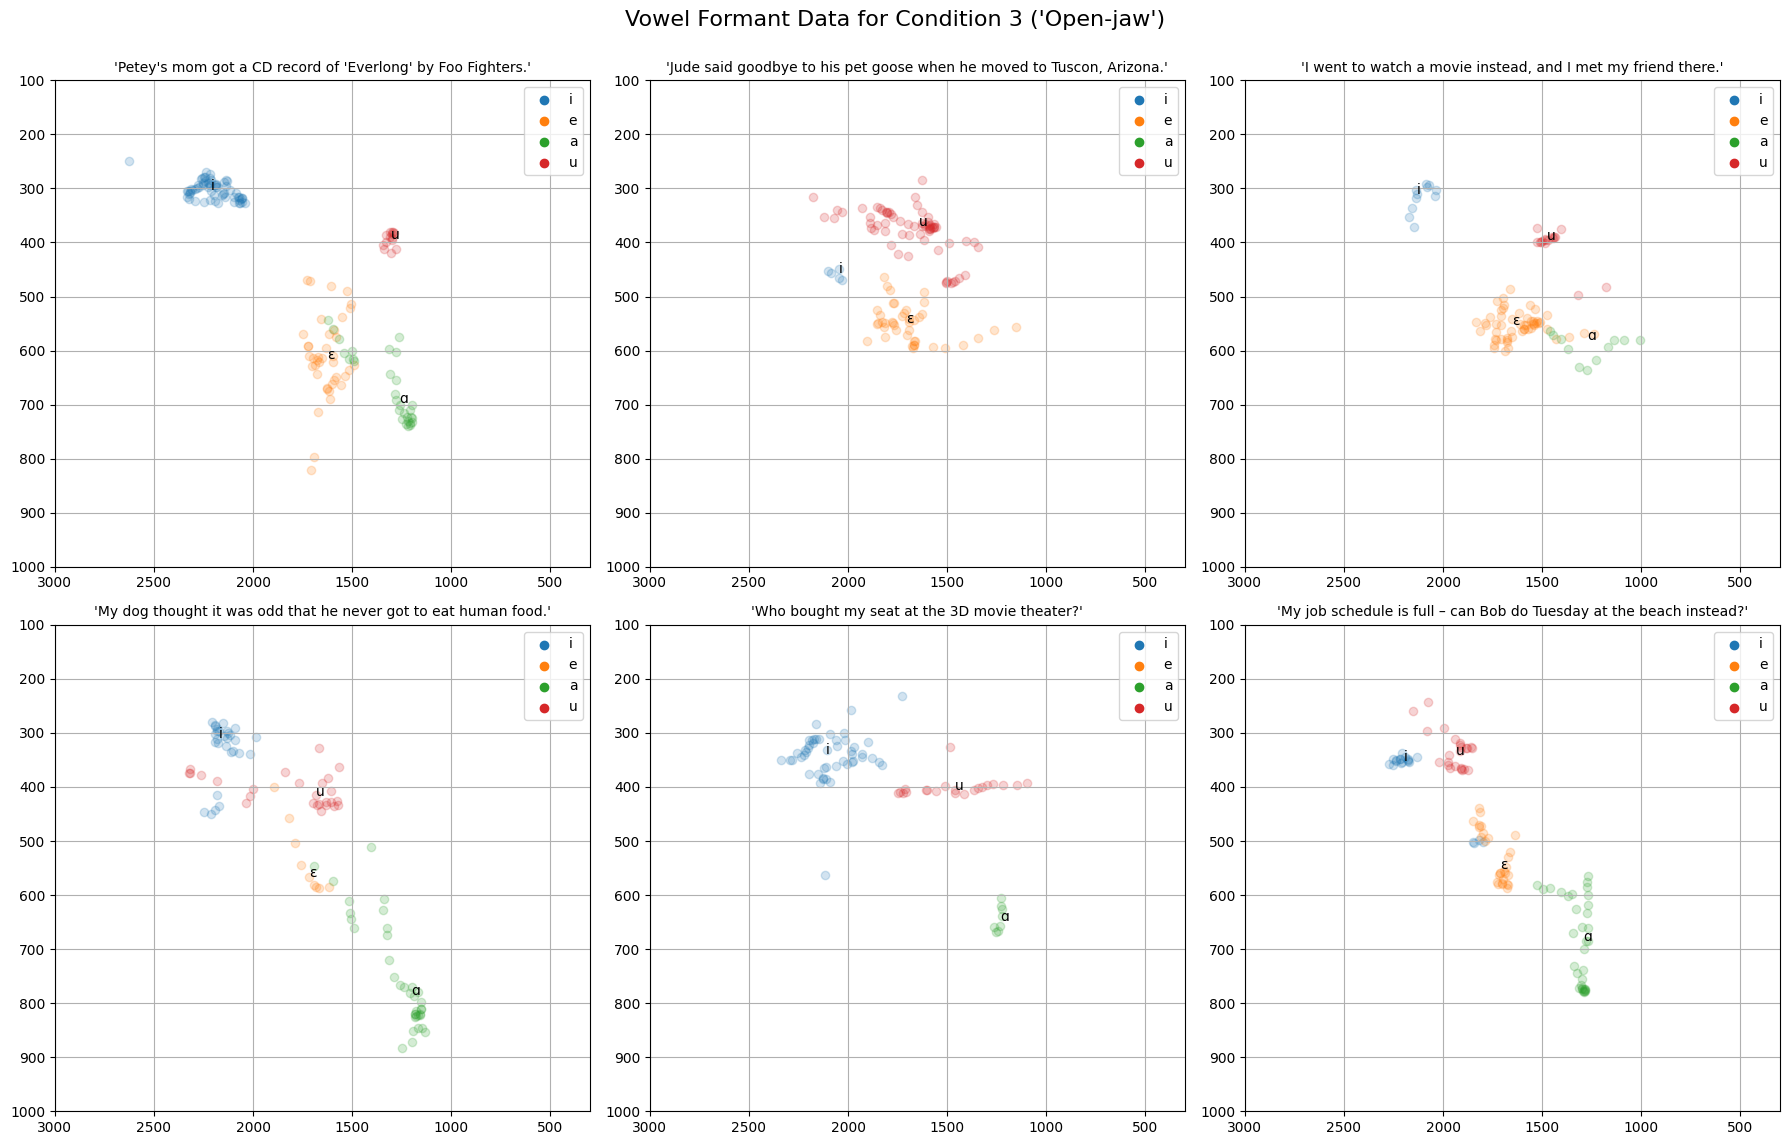

In [72]:
# Assuming `data`, `ipa`, `CONDITIONS`, and `TEXTS` are already defined

def plot_vowel_data_single(ax, c_id, s_id):
    vowel_data = data[f"c{c_id}s{s_id}"]
    
    for vowel, d in vowel_data.items():
        f1, f2 = d
        f1_med = np.nanmedian(f1)
        f2_med = np.nanmedian(f2)
        ax.scatter(f2, f1, marker="o", alpha=0.2, label=vowel)
        ax.annotate(text=ipa(vowel), xy=(f2_med, f1_med))
    
    ax.set_xlim(300, 3000)
    ax.set_ylim(100, 1000)
    ax.invert_yaxis()
    ax.invert_xaxis()
    ax.grid(True)
    
    leg = ax.legend()
    for lh in leg.legend_handles:
        lh.set_alpha(1)

# Specify the condition (e.g., condition 0)
condition_id = 2

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot the specified condition and each sentence in its respective subplot
for j in range(6):
    ax = axes[j // 3, j % 3]
    plot_vowel_data_single(ax, condition_id, j)
    
    # Set the titles for the columns (sentence numbers)
    ax.set_title(f"'{TEXTS[j]}'", fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(f"Vowel Formant Data for Condition {condition_id + 1} ('Open-jaw')", fontsize=16)
plt.show()


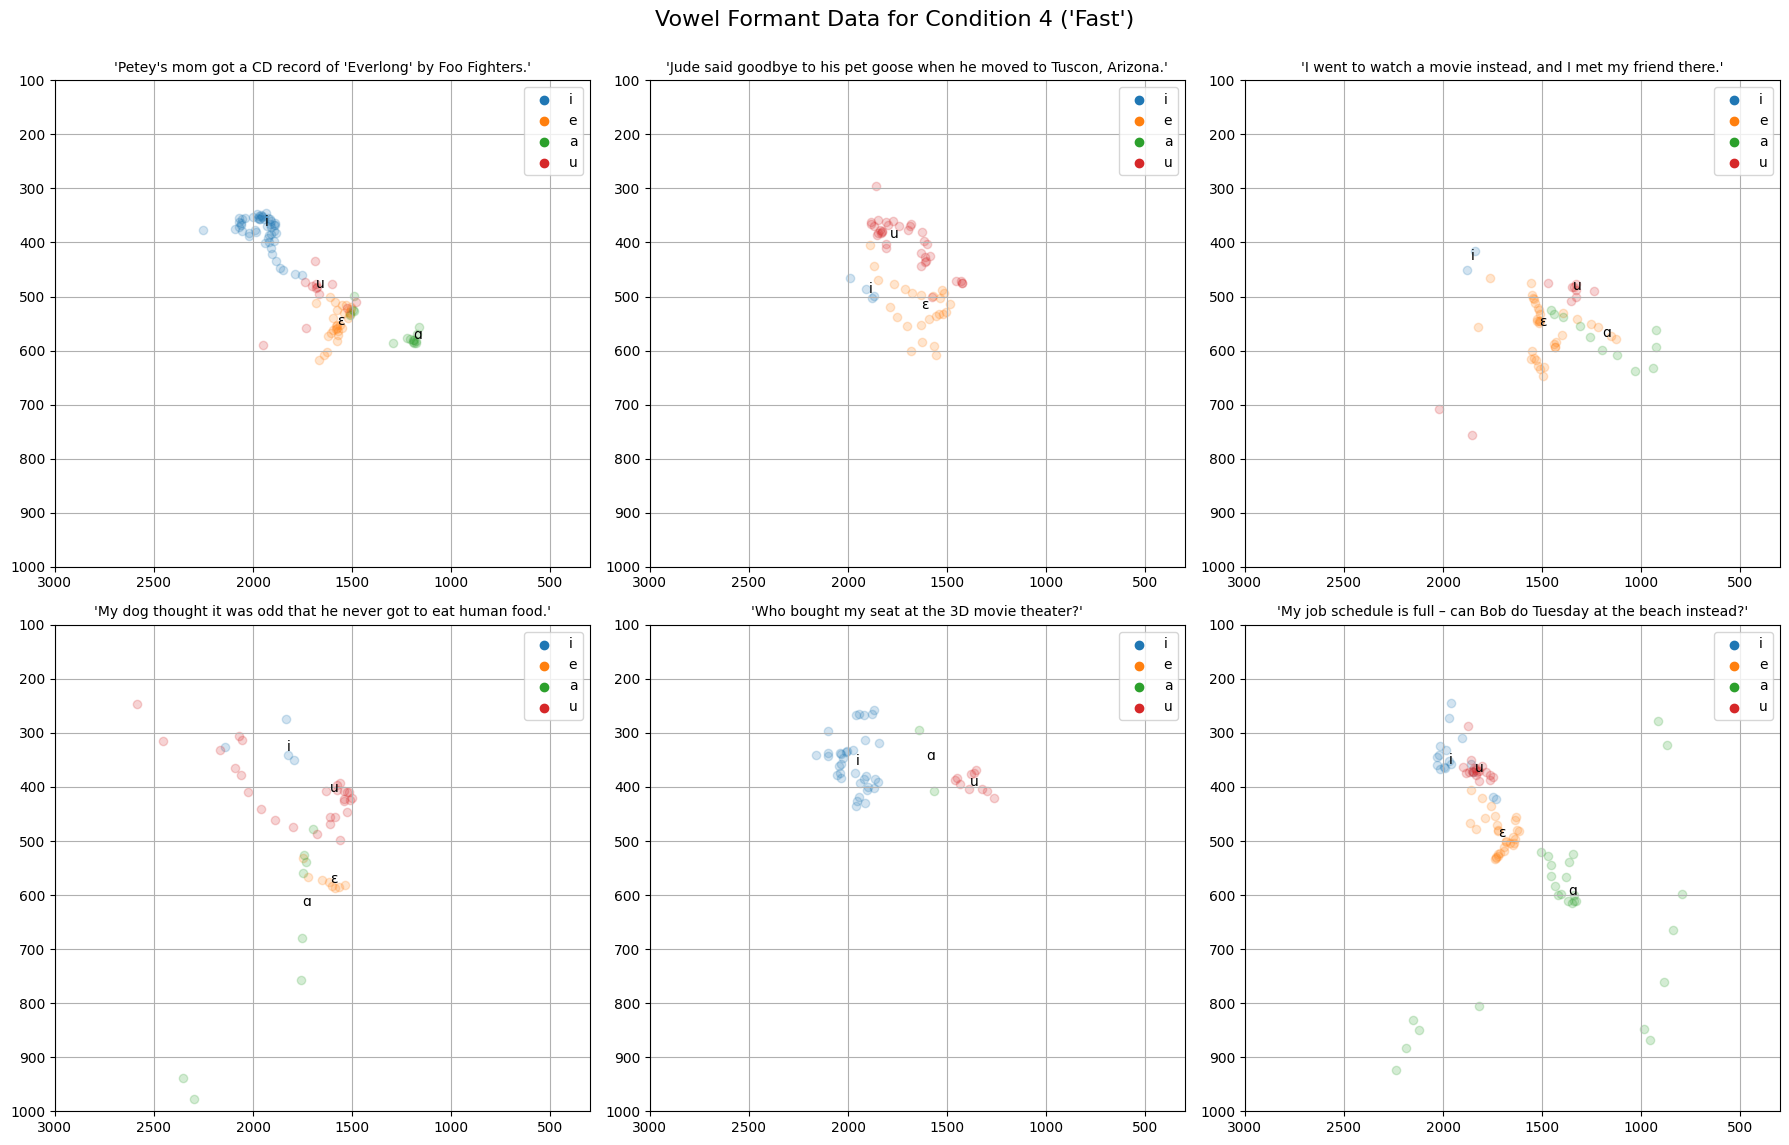

In [73]:
# Assuming `data`, `ipa`, `CONDITIONS`, and `TEXTS` are already defined

def plot_vowel_data_single(ax, c_id, s_id):
    vowel_data = data[f"c{c_id}s{s_id}"]
    
    for vowel, d in vowel_data.items():
        f1, f2 = d
        f1_med = np.nanmedian(f1)
        f2_med = np.nanmedian(f2)
        ax.scatter(f2, f1, marker="o", alpha=0.2, label=vowel)
        ax.annotate(text=ipa(vowel), xy=(f2_med, f1_med))
    
    ax.set_xlim(300, 3000)
    ax.set_ylim(100, 1000)
    ax.invert_yaxis()
    ax.invert_xaxis()
    ax.grid(True)
    
    leg = ax.legend()
    for lh in leg.legend_handles:
        lh.set_alpha(1)

# Specify the condition (e.g., condition 0)
condition_id = 3

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot the specified condition and each sentence in its respective subplot
for j in range(6):
    ax = axes[j // 3, j % 3]
    plot_vowel_data_single(ax, condition_id, j)
    
    # Set the titles for the columns (sentence numbers)
    ax.set_title(f"'{TEXTS[j]}'", fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(f"Vowel Formant Data for Condition {condition_id + 1} ('Careless')", fontsize=16)
plt.show()
